# Step 0: Import libraries and read dataset

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [7]:
df_original = pd.read_csv('data\StudentsPerformance.csv')
df = df_original.copy()



# Step 1: Data understanding
* Dataframe `shape`
* `head` and `tails`
* `dtype`
* `describe`

In [8]:
df.shape

(1000, 8)

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
df.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

# Step 2: Data preparation
* Dropping irrelavant columns
* Identifying duplicates
* Renaming columns
* Feature creation

In [12]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [16]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [19]:
df = df.rename(columns={
    'gender': 'Gender',
    'race/ethnicity': 'Ethnicity', 
    'parental level of education': 'Parents_Education', 
    'lunch': 'Lunch',  
    'test preparation course': 'Course',
    'math score': 'Math_Score',
    'reading score': 'Reading_Score',
    'writing score': 'Writing_Score'
    }
    ).copy()

In [20]:
df.head()

,Gender,Ethnicity,Parents_Education,Lunch,Course,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
df['Total_Score'] = df['Math_Score'] + df['Reading_Score'] + df['Writing_Score']
df['Average_Score'] = (df['Math_Score'] + df['Reading_Score'] + df['Writing_Score']) / 3

In [25]:
df.head()

,Gender,Ethnicity,Parents_Education,Lunch,Course,Math_Score,Reading_Score,Writing_Score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
df.drop(columns=['Reading_Score', 'Writing_Score', 'Math_Score'], axis=1, inplace=True)

In [27]:
df.head()

,Gender,Ethnicity,Parents_Education,Lunch,Course,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333
4,male,group C,some college,standard,none,229,76.333333


In [31]:
df['Course'].unique()

array(['none', 'completed'], dtype=object)

# Step 3: Feature Understanding
(univariate analysis)

* Plotting feature distribution
    * Histogram
    * KDE
    * Boxplot

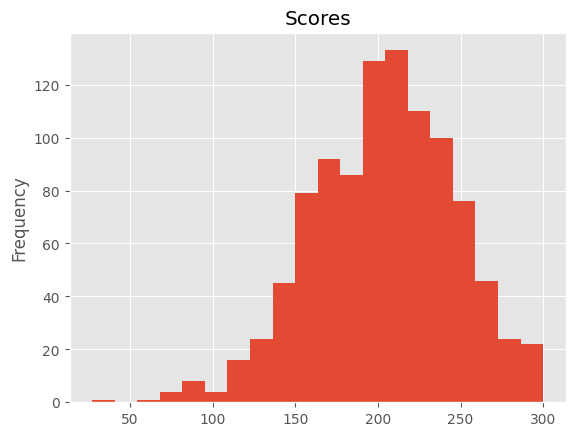

In [33]:
df['Total_Score'].plot(kind='hist', bins=20, title='Scores')
plt.show()

In [40]:
df.head()

,Gender,Ethnicity,Parents_Education,Lunch,Course,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333
4,male,group C,some college,standard,none,229,76.333333


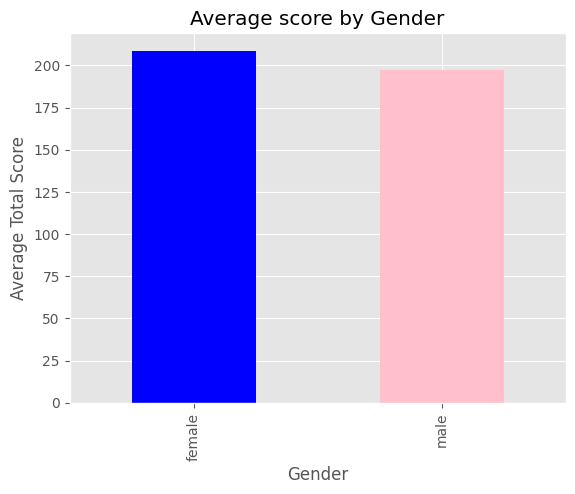

In [42]:
avg_score = df.groupby('Gender')['Total_Score'].mean()

avg_score.plot(kind='bar', color=['blue', 'pink'], title='Average score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Score')
plt.show()

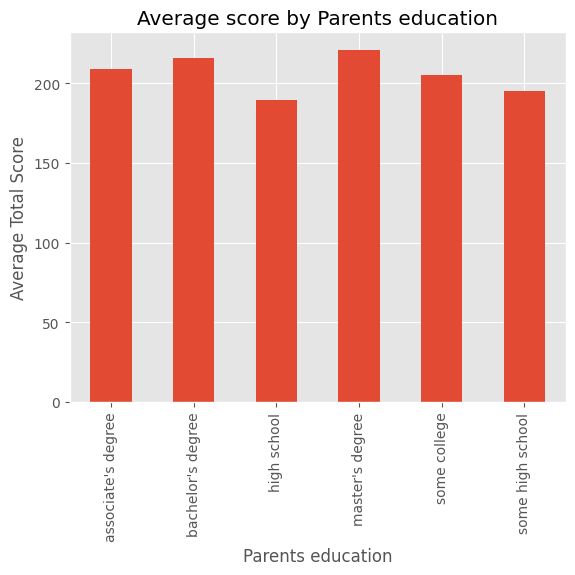

In [45]:
avg_score = df.groupby('Parents_Education')['Total_Score'].mean()

avg_score.plot(kind='bar', title='Average score by Parents education')
plt.xlabel('Parents education')
plt.ylabel('Average Total Score')
plt.show()

In [46]:
df['Parents_Education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [48]:
df['Parents_Education'] = df['Parents_Education'] \
    .replace({
        'high school': 1,
        'some high school': 1,
        'some college': 2,
        "associate's degree": 3,
        "bachelor's degree": 4,
        "master's degree":5
    })

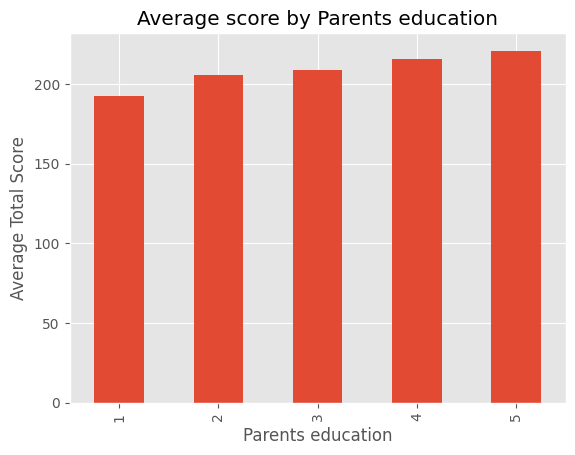

In [58]:
avg_score = df.groupby('Parents_Education')['Total_Score'].mean()

avg_score.plot(kind='bar', title='Average score by Parents education')
plt.xlabel('Parents education')
plt.ylabel('Average Total Score')
plt.show()

In [59]:
df.head()

,Gender,Ethnicity,Parents_Education,Lunch,Course,Total_Score,Average_Score
0,female,group B,4,standard,none,218,72.666667
1,female,group C,2,standard,completed,247,82.333333
2,female,group B,5,standard,none,278,92.666667
3,male,group A,3,free/reduced,none,148,49.333333
4,male,group C,2,standard,none,229,76.333333


In [64]:
df['Course'] = df['Course'] \
                    .replace({ "none": "Not completed"})

In [65]:
df['Course'].unique()

array(['Not completed', 'completed'], dtype=object)

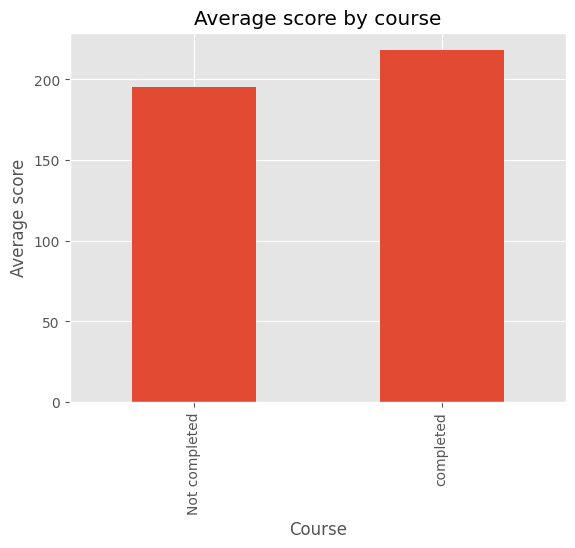

In [66]:
avg_score = df.groupby('Course')['Total_Score'].mean()
avg_score.plot(kind='bar', title='Average score by course')
plt.xlabel('Course')
plt.ylabel('Average score')
plt.show()

In [67]:
df.head()

,Gender,Ethnicity,Parents_Education,Lunch,Course,Total_Score,Average_Score
0,female,group B,4,standard,Not completed,218,72.666667
1,female,group C,2,standard,completed,247,82.333333
2,female,group B,5,standard,Not completed,278,92.666667
3,male,group A,3,free/reduced,Not completed,148,49.333333
4,male,group C,2,standard,Not completed,229,76.333333


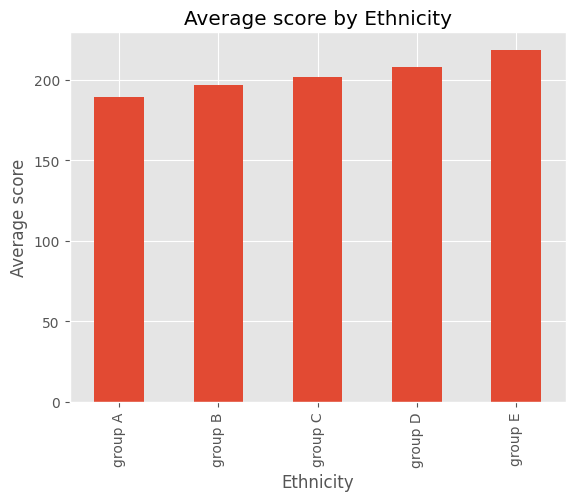

In [68]:
avg_score = df.groupby('Ethnicity')['Total_Score'].mean()
avg_score.plot(kind='bar', title='Average score by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Average score')
plt.show()

In [69]:
df['Lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

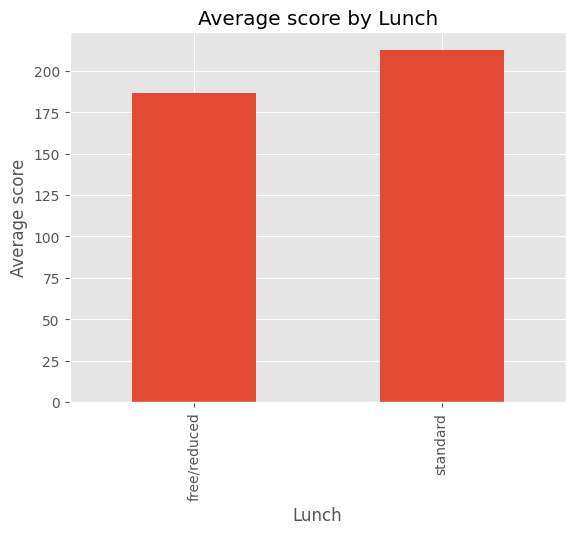

In [70]:
avg_score = df.groupby('Lunch')['Total_Score'].mean()
avg_score.plot(kind='bar', title='Average score by Lunch')
plt.xlabel('Lunch')
plt.ylabel('Average score')
plt.show()

# Step 4: Import analysis and questions

#### 1. Female students got little higher score than Male 
#### 2. Students with higher parent education got higher score
#### 3. Students who completed their course, got higher marks than those who didn't complete
#### 4. Higher ethinicity resulted higher score
#### 5. Students with standard lunch got higer score than students who got free/reduced lunch

In [72]:
df.to_csv('data/student_eda.csv')